In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Создание единого датасета

In [2]:
data_red = pd.read_csv('../data/winequality-red.csv', sep = ';')
data_white = pd.read_csv('../data/winequality-white.csv', sep = ';')
pd.set_option('display.max_columns', 30)

In [3]:
data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Объединим два датасета с красным и белым винами в единый (с учетом одинаковой структуры) для удобства дальнейшей работы

In [5]:
data = pd.concat([data_red, data_white])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


# Подготовка данных

## Пропущенные значения

Проверим датасеты на пропуски

In [7]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Обработка не требуется

## EDA

Изучим датасет на наличие выбросов

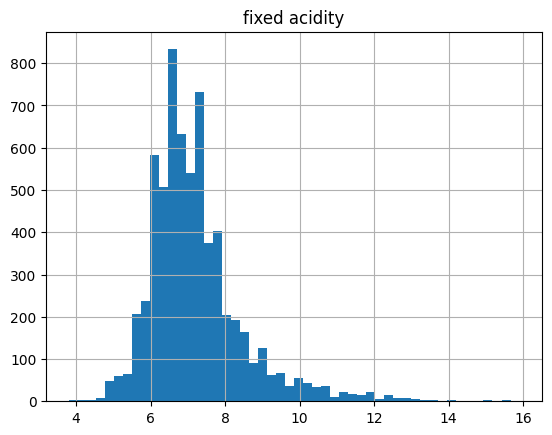

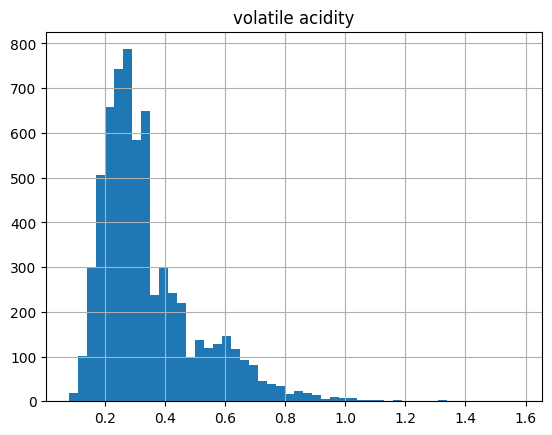

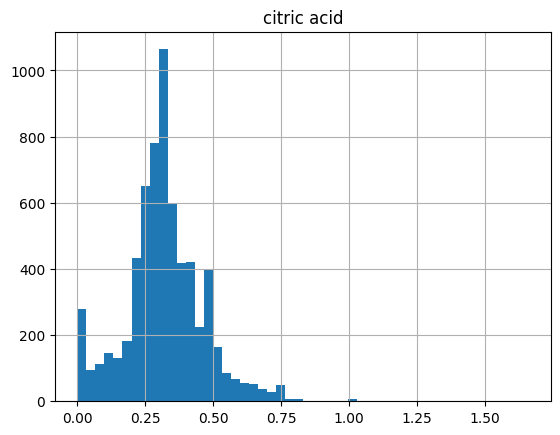

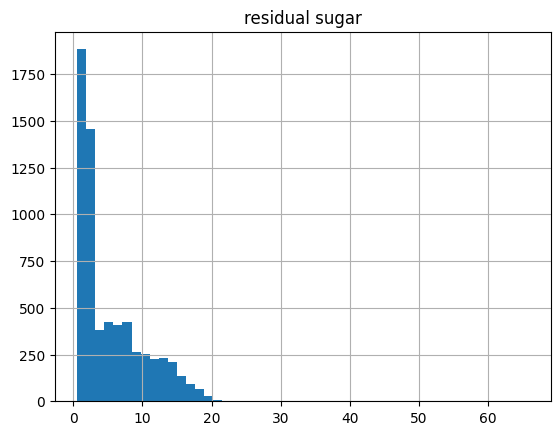

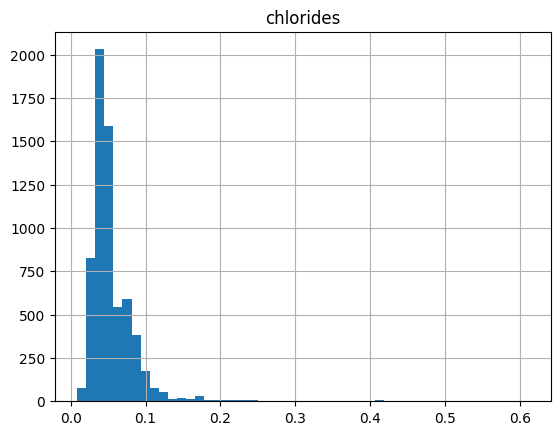

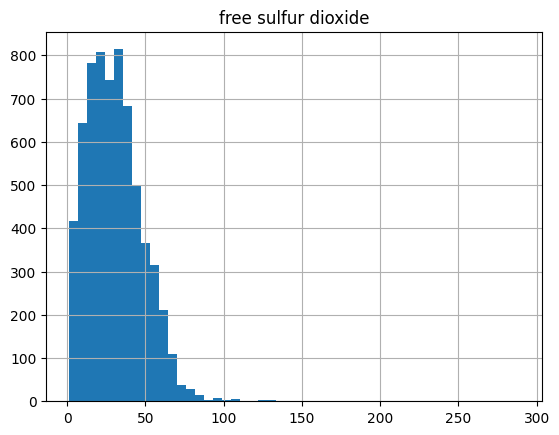

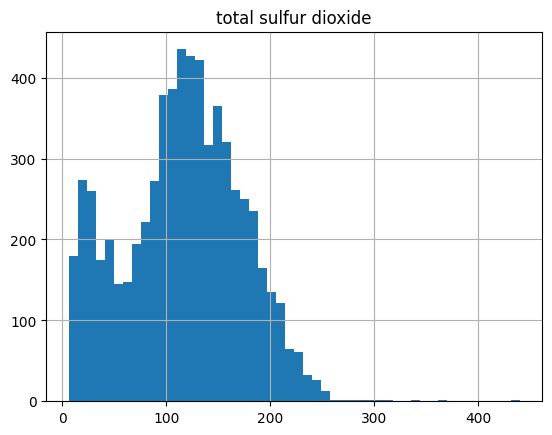

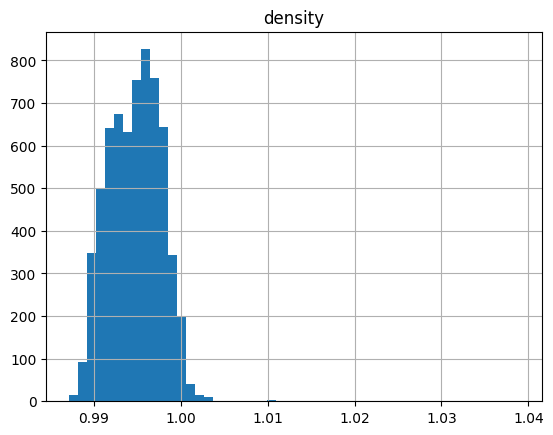

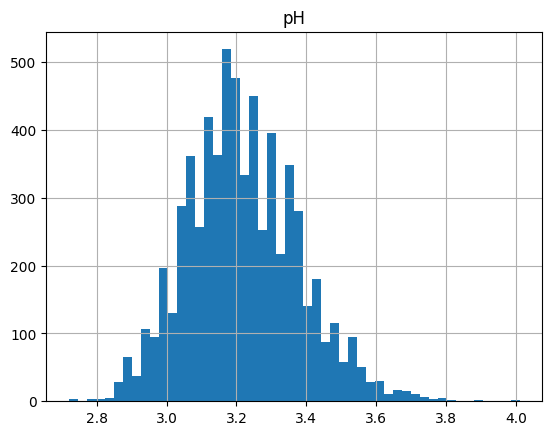

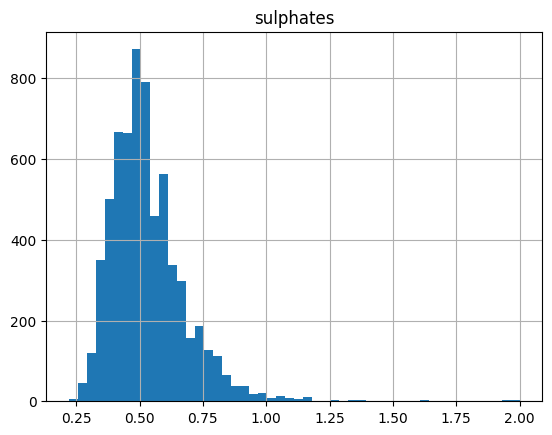

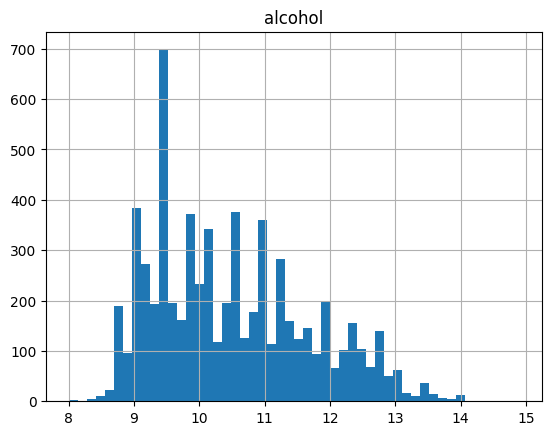

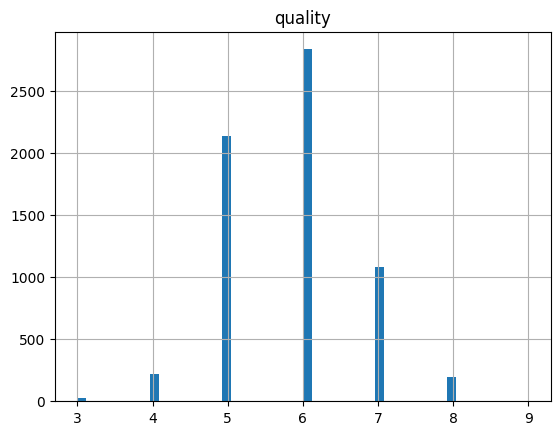

In [8]:
columns = data.columns.to_list()

for column in columns:
    data.hist(column, bins = 50)

Судя по гистограммам, распределение данных выглядит вполне естественно. Обработка выбросов не требуется.

# Разделение выборок

Отделим целевой признак от данных, разделим полученные датасеты на тренировочные и тестовые выборки

In [9]:
y = data['quality']
X = data.drop(['quality'], axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 11), (5197,), (1300, 11), (1300,))

# Регрессии

## Простая линейная регрессия

Определим функцию для расчета метрик качества модели

In [12]:
def show_errors(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = sqrt(mean_squared_error(y_test, y_pred))
    MAPE = sqrt(mean_absolute_percentage_error(y_test, y_pred))
    R2 = r2_score(y_test, y_pred)
    
    return {'MAE' : MAE, 'MSE' : MSE, 'RMSE' : RMSE, 'MAPE': MAPE, 'R2' : R2}

Построим тепловую карту для нахождения наиболее коррелирующего с предсказываемым признаков предиктора

<Axes: >

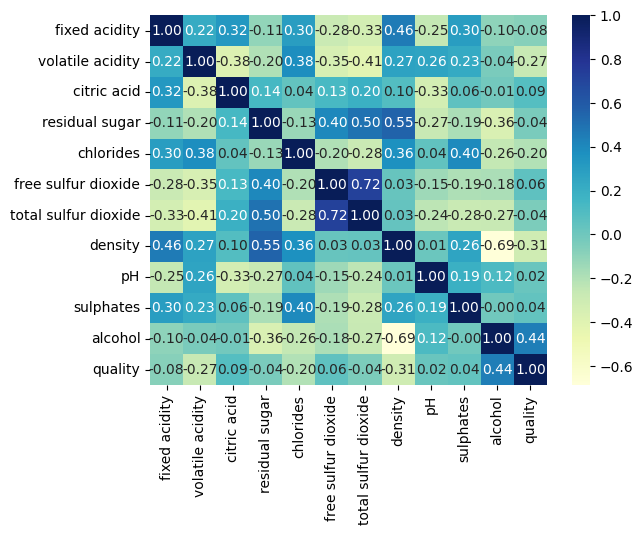

In [13]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")

Отделим наиболее коррелирующий с предсказываемым признаком предиктор alcohol и построим модель простой линейной регрессии

In [14]:
X_train_slr = X_train['alcohol'].values.reshape(-1,1)
X_test_slr = X_test['alcohol'].values.reshape(-1,1)
slr = LinearRegression().fit(X_train_slr, y_train)
y_pred = slr.predict(X_test_slr)

Выведем единственный вес предиктора

In [15]:
slr.coef_

array([0.3530715])

Выведем метрики ошибок

In [16]:
slr_def = show_errors(y_test, y_pred)
print(slr_def)

{'MAE': 0.5809698893995106, 'MSE': 0.5662007830864468, 'RMSE': 0.7524631440053704, 'MAPE': 0.3200400982953082, 'R2': 0.11827535815611068}


### Ridge

Найдем наилучший гиперпараметр для Ridge регуляризации с помощью поиска по сетке. Для этого сначала создадим массив возможных параметров

In [17]:
parameters_r = {'alpha': np.arange(0.01, 1, 0.1)}

Задаим поиск по сетке

In [18]:
ridge_optimal = GridSearchCV(Ridge(), parameters_r).fit(X_train_slr, y_train)
ridge_optimal.best_params_

{'alpha': 0.01}

Оптимальный параметр - 0.01

Обучим модель с учетом Ridge регуляризации

In [19]:
ridge_slr = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train_slr, y_train)
y_pred = ridge_slr.predict(X_test_slr)

Выведем метрики ошибок

In [20]:
slr_ridge = show_errors(y_test, y_pred)

### Lasso

Аналогично зададим массив допустимых параметров и определим наиболее оптимальный

In [21]:
parameters_l = {'alpha': np.arange(0.01, 1, 0.1)}

Обучим модель с учетом Lasso регуляризации

In [22]:
lasso_optimal = GridSearchCV(Lasso(), parameters_l).fit(X_train_slr, y_train)
lasso_optimal.best_params_

{'alpha': 0.01}

In [23]:
lasso_slr = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train_slr, y_train)
y_pred = lasso_slr.predict(X_test_slr)

In [24]:
slr_lasso = show_errors(y_test, y_pred)

### Elastic Net

Аналогично зададим словаль с массивами допустимых параметров и определим наиболее оптимальные из них. Далее применим параметры при обучении с учетом регуляризации Elastic Net.

In [25]:
parameters_elnet = {'alpha':[0.01,1,10,100],'l1_ratio':[0.01,0.75,0.99,1]}
elnet_optimal = GridSearchCV(ElasticNet(max_iter=100000), parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train_slr, y_train)
alpha = elnet_optimal.best_params_['alpha']
l1_ratio = elnet_optimal.best_params_['l1_ratio']

In [26]:
elnet_slr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_train_slr, y_train)
y_pred = elnet_slr.predict(X_test_slr)

Выведем ошибки

In [27]:
slr_elastic = show_errors(y_test, y_pred)

### Отбор наилучшей модели 

In [28]:
slr = [slr_def, slr_ridge, slr_lasso, slr_elastic]

Выберем наилучшую модель

In [29]:
for i in slr:
    print(i)

{'MAE': 0.5809698893995106, 'MSE': 0.5662007830864468, 'RMSE': 0.7524631440053704, 'MAPE': 0.3200400982953082, 'R2': 0.11827535815611068}
{'MAE': 0.5809697921076524, 'MSE': 0.5662005794976365, 'RMSE': 0.7524630087237754, 'MAPE': 0.3200400723698265, 'R2': 0.118275675197832}
{'MAE': 0.5795378097261122, 'MSE': 0.5633042344620374, 'RMSE': 0.750535964802512, 'MAPE': 0.3196582624874126, 'R2': 0.12278605184416747}
{'MAE': 0.5804587848281745, 'MSE': 0.5651440237759269, 'RMSE': 0.751760616004807, 'MAPE': 0.31990387464212555, 'R2': 0.11992101240530506}


Видим, что параметры в третьей строке наилучшие по MAE, MSE, RMSE, MAPE И R2, поэтому наилучшая модель это Lasso

In [30]:
print(slr[2])

{'MAE': 0.5795378097261122, 'MSE': 0.5633042344620374, 'RMSE': 0.750535964802512, 'MAPE': 0.3196582624874126, 'R2': 0.12278605184416747}


## Масштабирование

Масштабируем данные с помощью StandardScaler()

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train)

StandardScaler()

In [33]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Множественная линейная регрессия

Обучим модель множественной линейной регрессии для предсказания качества вина с помощью метода fit()

In [34]:
mlr = LinearRegression().fit(X_train, y_train)

Получим предсказания, просчитанные моделью на основе тестовой выборки

In [35]:
y_pred = mlr.predict(X_test)

Рассмотрим веса, присвоенные моделью признакам

In [36]:
mlr.coef_

array([ 0.0964694 , -0.21351224, -0.01615218,  0.20986046, -0.02260141,
        0.12229039, -0.14207034, -0.20172847,  0.07878959,  0.13894592,
        0.31313827])

Заметим, что часть признаков неинформативна по причине близости абсолютного значения к нулю. 

Рассчитаем метрики качества для полученного предсказания 

In [37]:
mlr_def = show_errors(y_test, y_pred)

### Ridge регуляризация

In [38]:
parameters_r = {'alpha': np.arange(0, 1, 0.1)}

Далее зададим поиск по сетке, который выберет наиболее оптимальный гиперпараметр для штрафа

In [39]:
ridge_optimal = GridSearchCV(Ridge(), parameters_r).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

Отсюда получаем, что alpha = 0.9

Теперь обучим модель, применяя Ridge регуляризацию с найденным параметром

In [40]:
ridge_mlr = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge_mlr.predict(X_test)

Рассмотрим веса, присвоенные моделью признакам по итогам обучения

In [41]:
ridge_mlr.coef_

array([ 0.0961413 , -0.2135158 , -0.01610277,  0.20940634, -0.02266424,
        0.12222511, -0.14192863, -0.20113195,  0.07859586,  0.13885223,
        0.31333072])

В результате Ridge регуляризации часть предикторов оказалась незначимымой по причине сильной близкости к нулю. Рассмотрим метрики ошибок        

In [42]:
mlr_ridge = show_errors(y_test, y_pred)

Отсюда видим, что с применением L1 результаты заметно не изменились. Перейдем к Lasso

### Lasso регуляризация

Проведем аналогичные операции

In [43]:
lasso_optimal = GridSearchCV(Lasso(), parameters_l).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.01}

Оптимальный коэффициент - 0.01 

In [44]:
lasso_mlr = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso_mlr.predict(X_test)

In [45]:
mlr_lasso = show_errors(y_test, y_pred)

### Elastic Net

In [46]:
parameters_elnet = {'alpha':[0.01,1,10,100],'l1_ratio':[0.01,0.75,0.99,1]}
elnet_optimal = GridSearchCV(ElasticNet(max_iter=100000), parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train_slr, y_train)
alpha = elnet_optimal.best_params_['alpha']
l1_ratio = elnet_optimal.best_params_['l1_ratio']
elnet_optimal.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

In [47]:
elnet_mlr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_train, y_train)
y_pred = elnet_mlr.predict(X_test)

In [48]:
mlr_elastic = show_errors(y_test, y_pred)

### Отбор наилучшей модели 

In [49]:
mlr = [mlr_def, mlr_ridge, mlr_lasso, mlr_elastic]

In [50]:
for i in mlr:
    print(i)

{'MAE': 0.5592143858580604, 'MSE': 0.5221471524819297, 'RMSE': 0.7225975037888864, 'MAPE': 0.31566426129219793, 'R2': 0.18687853361438322}
{'MAE': 0.5591999835493925, 'MSE': 0.5221218493490357, 'RMSE': 0.7225799951209801, 'MAPE': 0.3156599156488767, 'R2': 0.18691793729670747}
{'MAE': 0.5571815125263283, 'MSE': 0.5171910616057219, 'RMSE': 0.7191599694127322, 'MAPE': 0.3149011661751926, 'R2': 0.1945964802921485}
{'MAE': 0.5584910276985948, 'MSE': 0.5208654446163834, 'RMSE': 0.7217100834936307, 'MAPE': 0.3154459331944124, 'R2': 0.18887449236692488}


Наилучшей моделью оказалась, как и в прошлый раз, Lasso

In [51]:
print(mlr[2])

{'MAE': 0.5571815125263283, 'MSE': 0.5171910616057219, 'RMSE': 0.7191599694127322, 'MAPE': 0.3149011661751926, 'R2': 0.1945964802921485}


## Полиномиальная регрессия

Определим набор входных данных для пайплайна: StandardScaler() для масштабирования, PolynomialFeatures для создания полинома и модель линейной регрессии

In [52]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())] 

Инициализируем пайплайн

In [53]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Теперь обучим модель линейной регрессии при помощи пайплайна

In [54]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Далее обратимся к модели и вычислим предикты

In [55]:
y_pred = pipe.predict(X_test)

Рассмотрим метрики ошибок

In [56]:
ppl_def = show_errors(y_test, y_pred)

Отсюда видно, что средний процент ошибки мало отличается от той же характеристики модели множественной регрессии, ровно как и остальные метрики. Рассмотрим реальное и предсказанное распределение данных

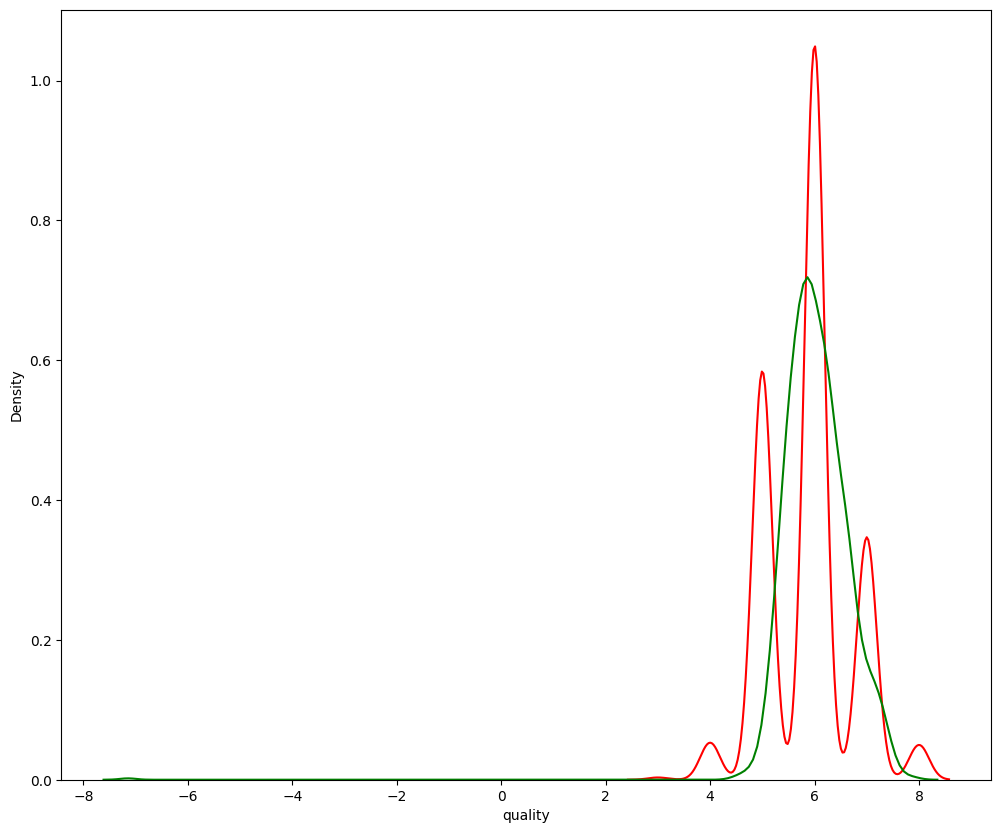

In [57]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
plt.show()

Видно, что модель относительно правдоподобно предсказывает реальные значения. Попробуем повысить степень до 3 и посмотреть, как изменятся метрики и визуальное представление распределения данных

In [58]:
Input1 = [('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model', LinearRegression())]
pipe1 = Pipeline(Input1)
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

show_errors(y_test, y_pred1)

{'MAE': 0.5772360970774983,
 'MSE': 0.9585804615985855,
 'RMSE': 0.9790712239661553,
 'MAPE': 0.3245149827899614,
 'R2': -0.49276376760594864}

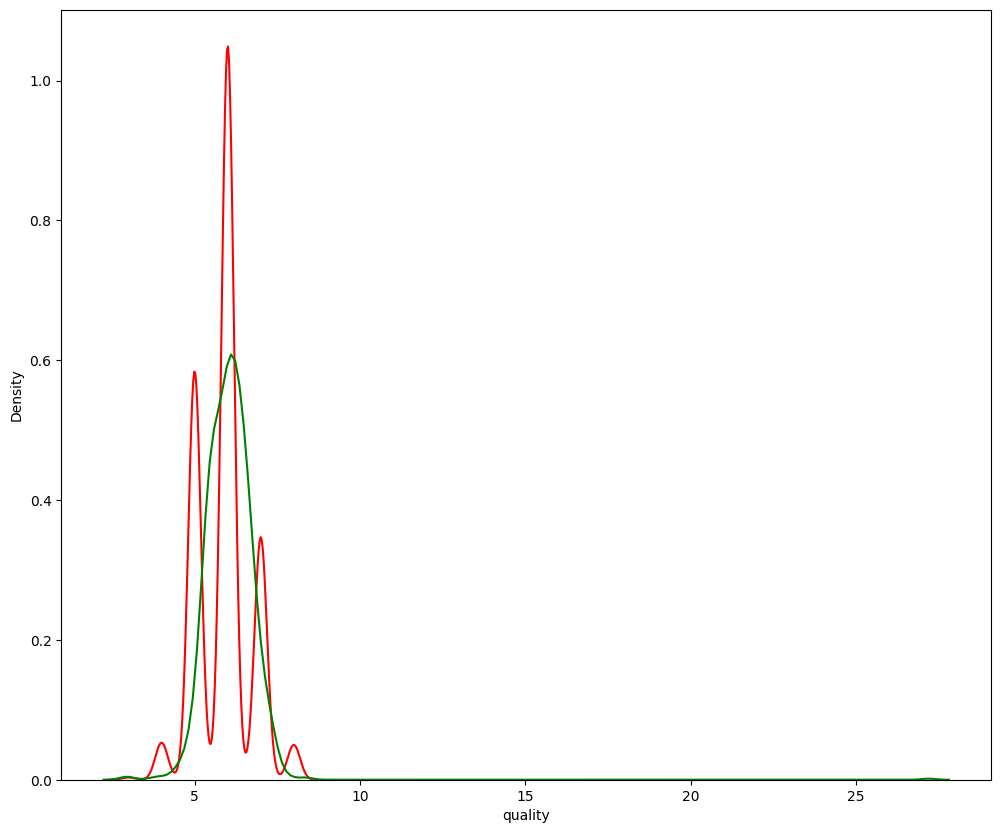

In [59]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred1, hist=False, color='Green', label='Predicted values')
plt.show()

От повышения степени показатели лишь ухудшились, поэтому перейдем к регуляриациям

### Ridge регуляризация

Создадим новый набор входных данных для пайплайна, включающий в себя Ridge регуляризацию c гиперпараметром из пункта о множественной регуляризации

In [60]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Ridge(alpha=0.9))]
pipe_r = Pipeline(Input)
pipe_r.fit(X_train, y_train)
y_pred = pipe_r.predict(X_test)

ppl_ridge = show_errors(y_test, y_pred)

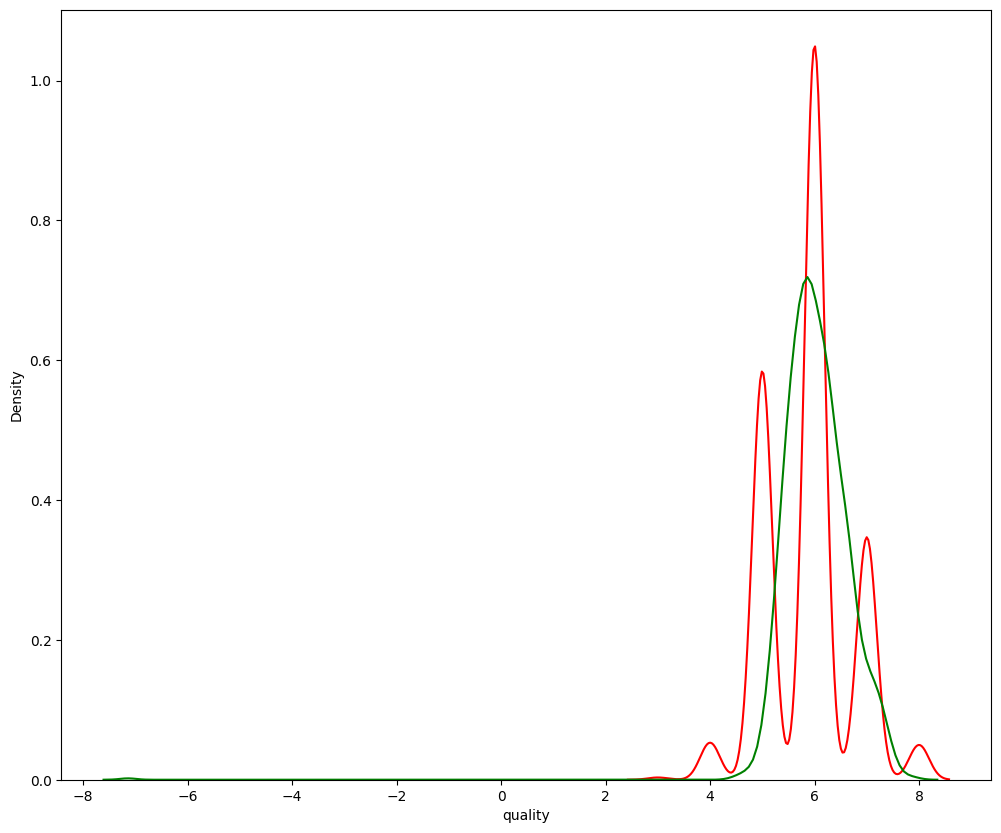

In [61]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
plt.show()

Из данных выше видно, что метрики модели практически не изменились по итогам регуляризации

### Lasso регуляризация

In [62]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', Lasso(alpha=0.01))]
pipe_l = Pipeline(Input)
pipe_l.fit(X_train, y_train)
y_pred = pipe_l.predict(X_test)

ppl_lasso = show_errors(y_test, y_pred)

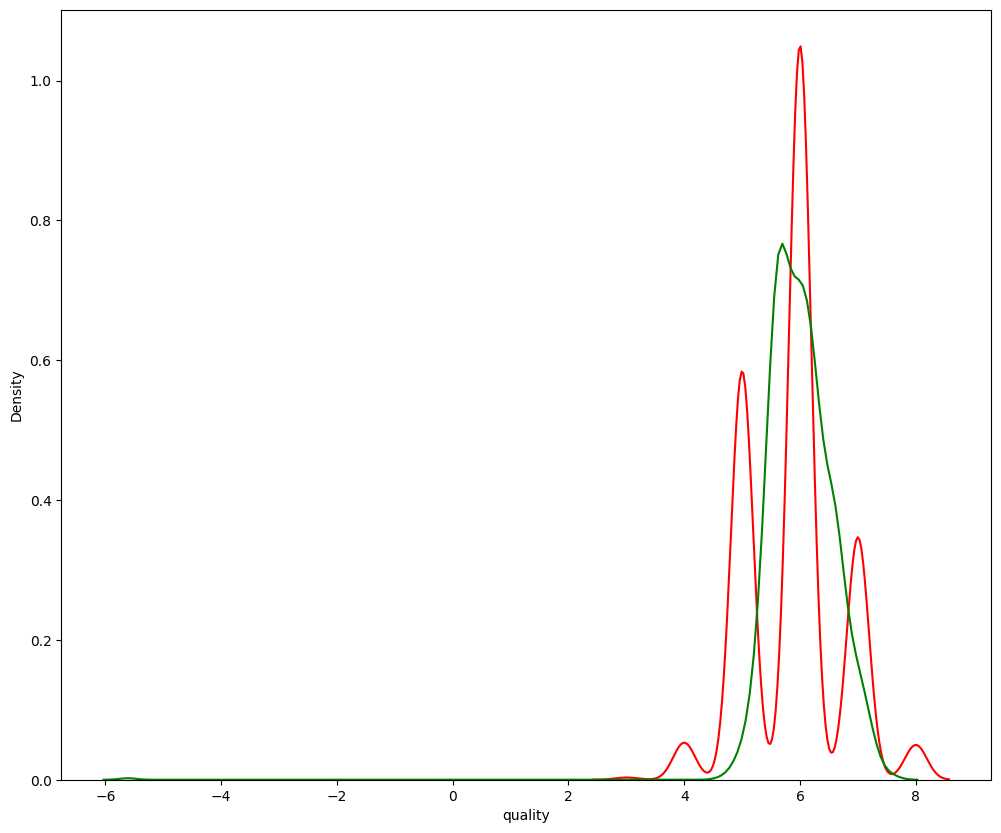

In [63]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
plt.show()

### Elactic Net

In [64]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', ElasticNet(alpha=0.01, l1_ratio=0.01))]
pipe_elnet = Pipeline(Input)
pipe_elnet.fit(X_train, y_train)
y_pred = pipe_elnet.predict(X_test)

ppl_elastic = show_errors(y_test, y_pred)

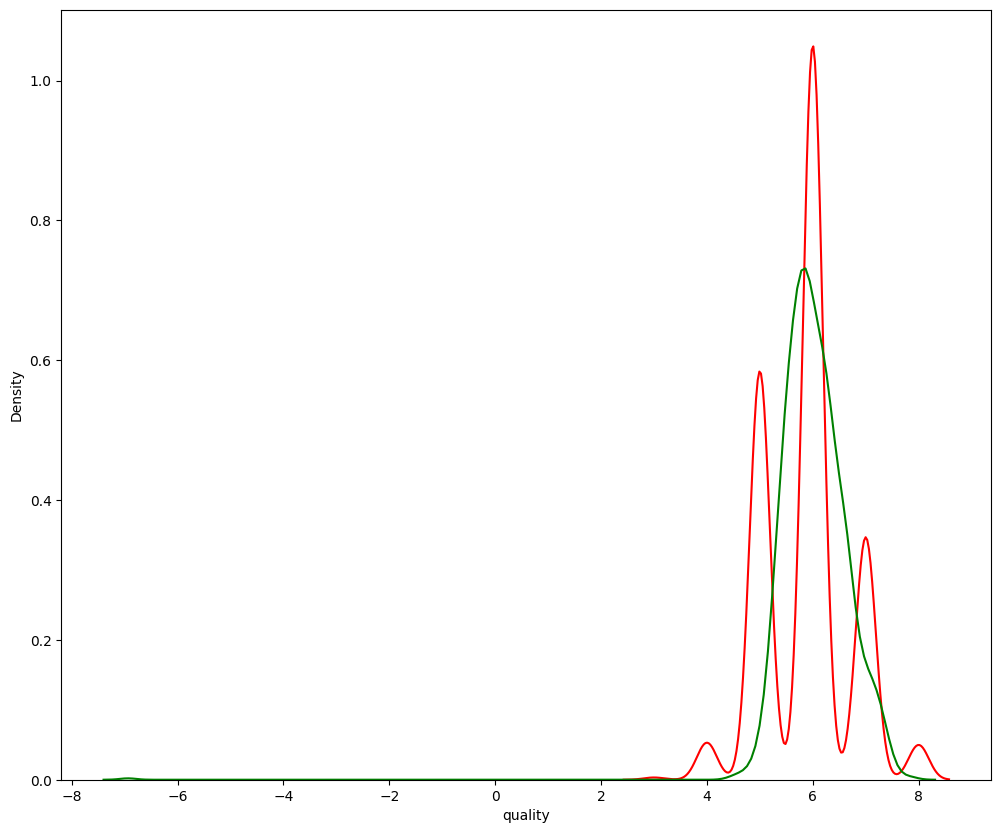

In [65]:
plt.figure(figsize=(12,10))
ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
plt.show()

### Отбор наилучшей модели 

In [66]:
ppl = [ppl_def, ppl_ridge, ppl_lasso, ppl_elastic]

In [67]:
for i in ppl:
    print(i)

{'MAE': 0.5649649598681687, 'MSE': 0.5677768522801074, 'RMSE': 0.7535096895728066, 'MAPE': 0.3186818223695565, 'R2': 0.11582100082066804}
{'MAE': 0.5649792178522757, 'MSE': 0.5677644091430472, 'RMSE': 0.753501432741204, 'MAPE': 0.3186834190653806, 'R2': 0.11584037808204894}
{'MAE': 0.561380912747684, 'MSE': 0.5464972219611914, 'RMSE': 0.7392545041872869, 'MAPE': 0.3173530839210291, 'R2': 0.14895902355394275}
{'MAE': 0.563951020878724, 'MSE': 0.5634477099845591, 'RMSE': 0.7506315407605512, 'MAPE': 0.31834212887192936, 'R2': 0.12256262243981508}


Наилучшей моделью оказалась Lasso

In [68]:
print(ppl[2])

{'MAE': 0.561380912747684, 'MSE': 0.5464972219611914, 'RMSE': 0.7392545041872869, 'MAPE': 0.3173530839210291, 'R2': 0.14895902355394275}


# Выбор лучшей модели

In [69]:
print(slr[2])
print(mlr[2])
print(ppl[2])

{'MAE': 0.5795378097261122, 'MSE': 0.5633042344620374, 'RMSE': 0.750535964802512, 'MAPE': 0.3196582624874126, 'R2': 0.12278605184416747}
{'MAE': 0.5571815125263283, 'MSE': 0.5171910616057219, 'RMSE': 0.7191599694127322, 'MAPE': 0.3149011661751926, 'R2': 0.1945964802921485}
{'MAE': 0.561380912747684, 'MSE': 0.5464972219611914, 'RMSE': 0.7392545041872869, 'MAPE': 0.3173530839210291, 'R2': 0.14895902355394275}


С учетом большого отрыва в R2 наилучшей моделью можно считать множественную линейную регрессию.